In [39]:
%matplotlib inline

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pycountry_convert as pc

import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.linear_model import LogisticRegression

- Run in the command prompt:
    - pip install pycountry-convert
    - pip install plotly==4.9.0

# Happiness report

<img src="https://media.giphy.com/media/11sBLVxNs7v6WA/giphy.gif" width="700" align="center">

## Abstract
The purpose of choosing this work is to find out which factors are more important to live a happier life. As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. We will also compare the happiness dataset from 2019 with older data.

## Introduction
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2019, which ranks 156 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Meaning of terms used in the dataset

- **GDP per capita**:GDP per capita is a measure of a country's economic output that accounts for its number of people.
- **Social support**:Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.
- **Healthy life expectancy**:Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.
- **Freedom to make life choices**:Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
- **Generosity**:the quality of being kind and generous.
- **Perceptions of corruption**:The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

## Initial Data Exploration

In [41]:
happiness_data_2015 = pd.read_csv("data/2015.csv")
happiness_data_2016 = pd.read_csv("data/2016.csv")
happiness_data_2017 = pd.read_csv("data/2017.csv")
happiness_data_2018 = pd.read_csv("data/2018.csv")
happiness_data_2019 = pd.read_csv("data/2019.csv")

In [42]:
happiness_data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


- Our dataset is pretty clean, but we will implement a few adjustments to make it looks better.

In [43]:
happiness_data_2019.shape

(156, 9)

- Lets check column data types

In [44]:
happiness_data_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

- The column names are not in python format, so we are going to change them.

In [45]:
happiness_data_2019.columns = ["rank", "country", "score", "gdp", "social_support", "healthy_life", "freedom", "generosity", "trust"]
happiness_data_2019.sample(n=10)

,rank,country,score,gdp,social_support,healthy_life,freedom,generosity,trust
52,53,Latvia,5.940,1.187,1.465,0.812,0.264,0.075,0.064
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
36,37,Bahrain,6.199,1.362,1.368,0.871,0.536,0.255,0.110
125,126,Iraq,4.437,1.043,0.980,0.574,0.241,0.148,0.089
51,52,Thailand,6.008,1.050,1.409,0.828,0.557,0.359,0.028
37,38,Slovakia,6.198,1.246,1.504,0.881,0.334,0.121,0.014
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
42,43,Colombia,6.125,0.985,1.410,0.841,0.470,0.099,0.034
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143
112,113,Namibia,4.639,0.879,1.313,0.477,0.401,0.070,0.056


- The next step is adding another column to the dataset which is continent. I want to work on different continents to discover whether there are different trends for them regarding which factors play a significant role in gaining higher happiness score. We will not include Antarctica in our research, so the remaining continents are Asia, Africa, North America, South America, Europe and Australia.

    - First we create a dictionary with key: continent code | value: continent full name

In [46]:
continents = {
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa'
}

    - Following function takes country name as argument and returns the continent full name

In [47]:
def get_continent_by_country(country):
    if country == "Kosovo":
        return "Europe"
    country_alpha2_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    continent_code = pc.country_alpha2_to_continent_code(country_alpha2_code)
    return continents[continent_code]
    

    - Test the get_continent_by_country function

In [48]:
get_continent_by_country("China")

'Asia'

In [49]:
get_continent_by_country("Bulgaria")

'Europe'

In [50]:
get_continent_by_country("Argentina")

'South America'

In [51]:
get_continent_by_country("Australia")

'Australia'

In [52]:
get_continent_by_country("Egypt")

'Africa'

    - Some of the country names contains special symbols or are not correct, so the next row fix the invalid names:

In [53]:
happiness_data_2019.country = happiness_data_2019.country.replace(
    ["Trinidad & Tobago", "Congo (Brazzaville)", "Congo (Kinshasa)", "Palestinian Territories"], 
    ["Trinidad and Tobago", "Congo", "Democratic Republic of the Congo", "Palestine"])

    - Then we add a new column in happiness data frame named "continent". We place it right after the country column.

In [54]:
happiness_data_2019.insert(2, "continent", happiness_data_2019.country.apply(get_continent_by_country))

In [55]:
happiness_data_2019.sample(n = 5)

,rank,country,continent,score,gdp,social_support,healthy_life,freedom,generosity,trust
148,149,Syria,Asia,3.462,0.619,0.378,0.440,0.013,0.331,0.141
11,12,Costa Rica,North America,7.167,1.034,1.441,0.963,0.558,0.144,0.093
70,71,Moldova,Europe,5.529,0.685,1.328,0.739,0.245,0.181,0.000
138,139,Togo,Africa,4.085,0.275,0.572,0.410,0.293,0.177,0.085
114,115,Burkina Faso,Africa,4.587,0.331,1.056,0.380,0.255,0.177,0.113


- Lets check the data for NaN values

In [56]:
happiness_data_2019.isnull().values.any()

False

In [57]:
happiness_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
rank              156 non-null int64
country           156 non-null object
continent         156 non-null object
score             156 non-null float64
gdp               156 non-null float64
social_support    156 non-null float64
healthy_life      156 non-null float64
freedom           156 non-null float64
generosity        156 non-null float64
trust             156 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


    - We don't see any NaN entries

## Visualization
In this section, we will play with different variables to find out how they correlate with each other.

### Correlation plot
Let’s see the correlation between numerical variables in our dataset.

In [58]:
def draw_correlation_heatmap_matrix(dataframe):
    plt.figure(figsize=(16,10))
    sns.heatmap(dataframe.corr(), annot=True, linewidths=1, cmap="ocean_r", fmt=".2f")

    plt.suptitle("Correlation Matrix", fontsize=18)

    plt.show()

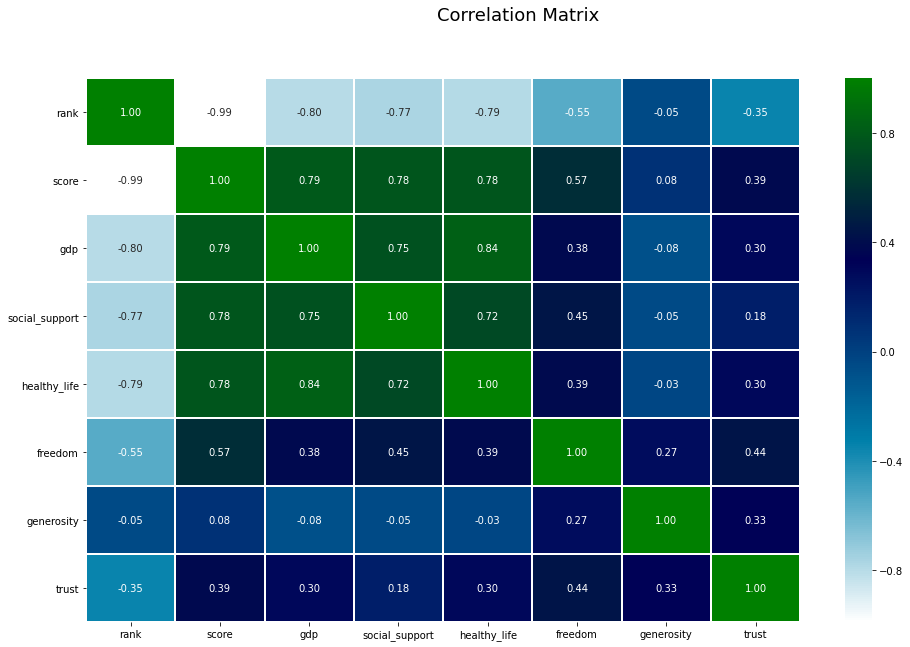

In [59]:
draw_correlation_heatmap_matrix(happiness_data_2019)

Obviously, there is an inverse correlation between “Happiness Rank” and all the other numerical variables. In other words, the lower the happiness rank, the higher the happiness score, and the higher the other six factors that contribute to happiness. So let’s remove the happiness rank, and see the correlation again.

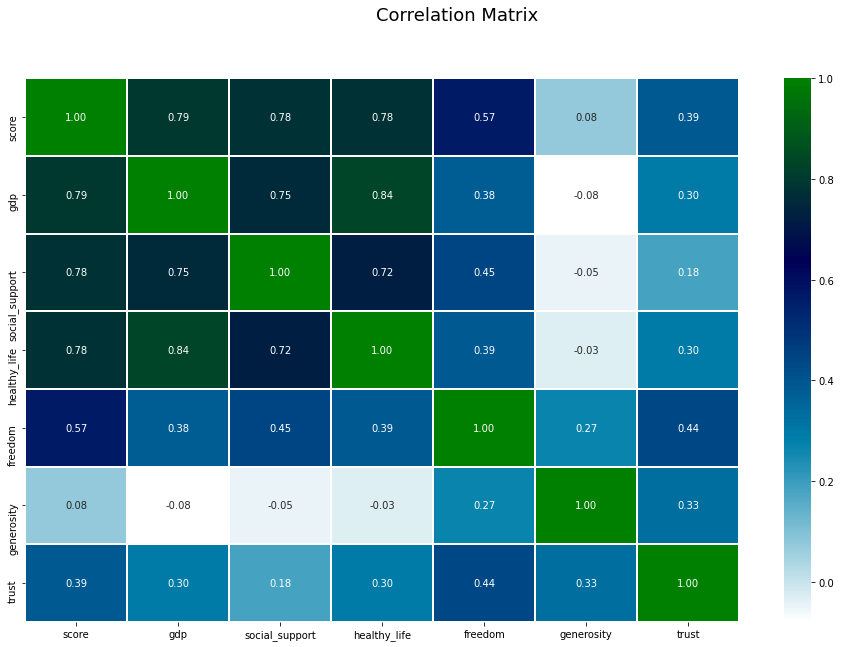

In [60]:
happiness_data_2019_without_rank = happiness_data_2019.drop(["rank"], axis=1)
draw_correlation_heatmap_matrix(happiness_data_2019_without_rank)

- According to the above correlation plot: gdp, healthy life expectancy, and social support play the most significant role in contributing to happiness. Trust and generosity have the lowest impact on the happiness score.

### Comparing different continents regarding their happiness variables


In [61]:
group_by_continent = happiness_data_2019.groupby("continent")

- First lets check number of contries that took part in the research by continent

In [62]:
group_by_continent_size = group_by_continent.size().sort_values(ascending=False)

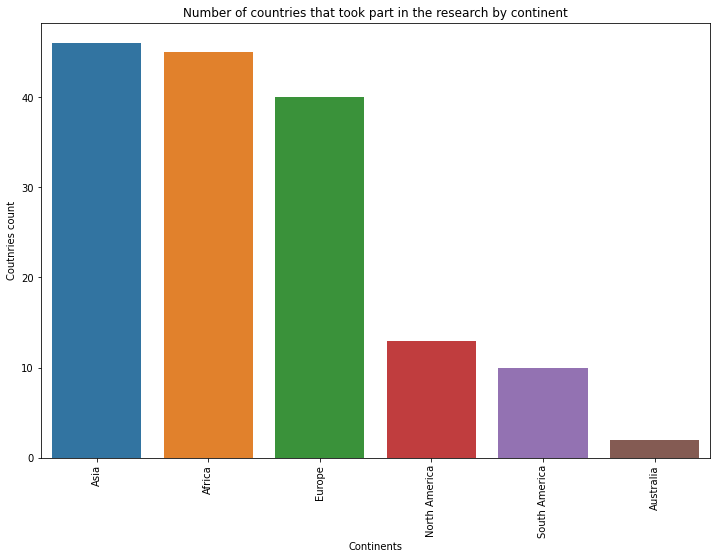

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x=group_by_continent_size.index, y=group_by_continent_size.values)
plt.xticks(rotation=90)
plt.xlabel('Continents')
plt.ylabel('Coutnries count')
plt.title('Number of countries that took part in the research by continent')
plt.show()

In [64]:
def plot_continents_barchart(data, ylabel, title):
    plt.figure(figsize=(12, 8))
    plt.xlabel("Continents")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.bar(data.index, data.values)
    plt.show()

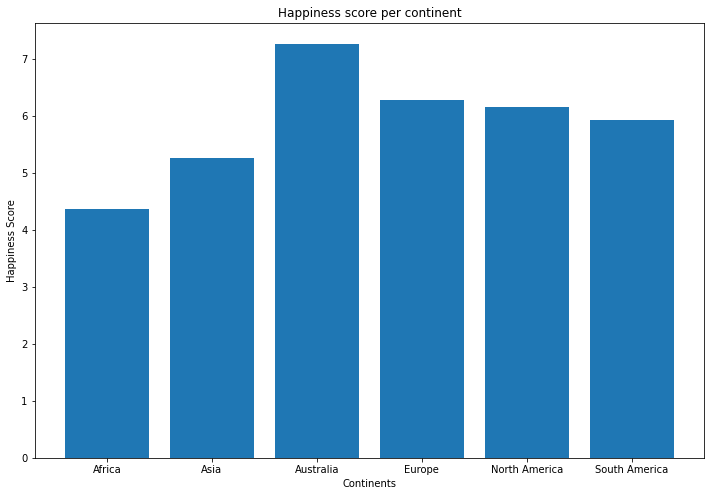

In [65]:
score_by_continent = group_by_continent["score"].mean()
plot_continents_barchart(score_by_continent, "Happiness Score", "Happiness score per continent")

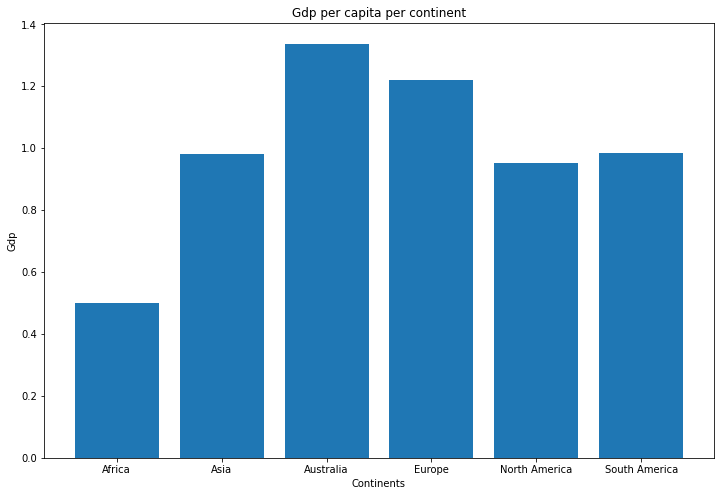

In [66]:
score_by_continent = group_by_continent["gdp"].mean()
plot_continents_barchart(score_by_continent, "Gdp", "Gdp per capita per continent")

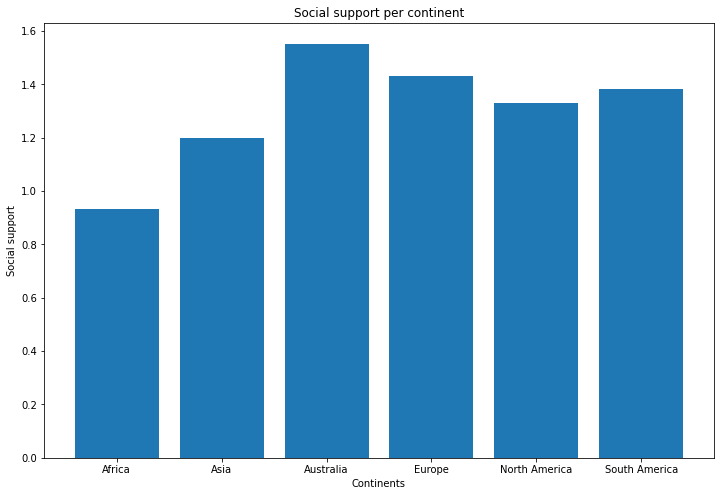

In [67]:
score_by_continent = group_by_continent["social_support"].mean()
plot_continents_barchart(score_by_continent, "Social support", "Social support per continent")

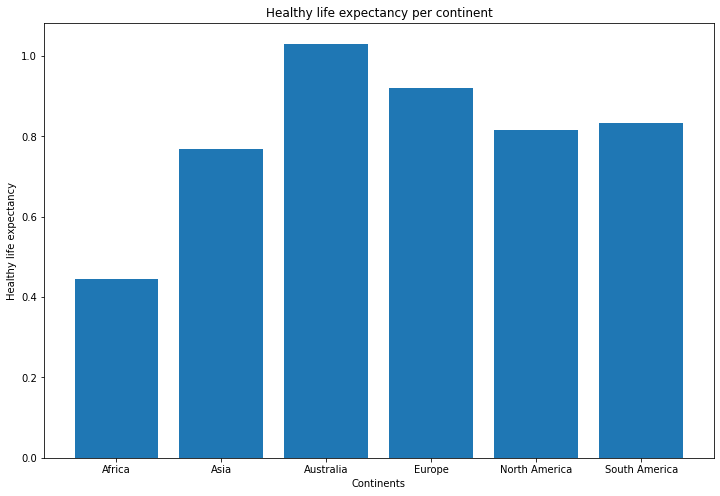

In [68]:
score_by_continent = group_by_continent["healthy_life"].mean()
plot_continents_barchart(score_by_continent, "Healthy life expectancy", "Healthy life expectancy per continent")

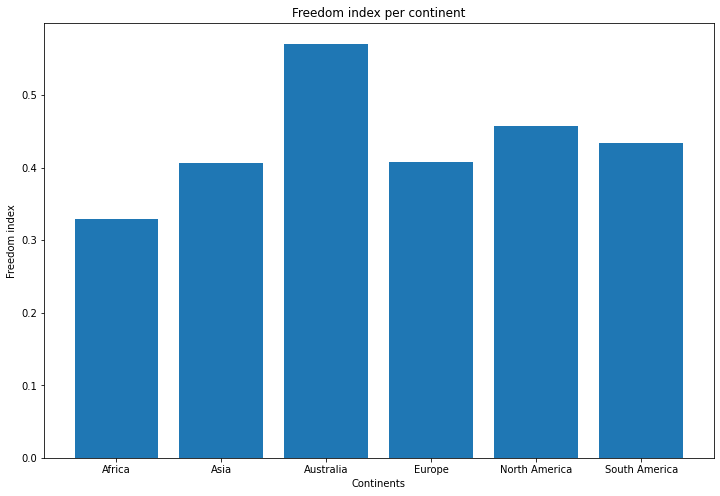

In [69]:
score_by_continent = group_by_continent["freedom"].mean()
plot_continents_barchart(score_by_continent, "Freedom index", "Freedom index per continent")

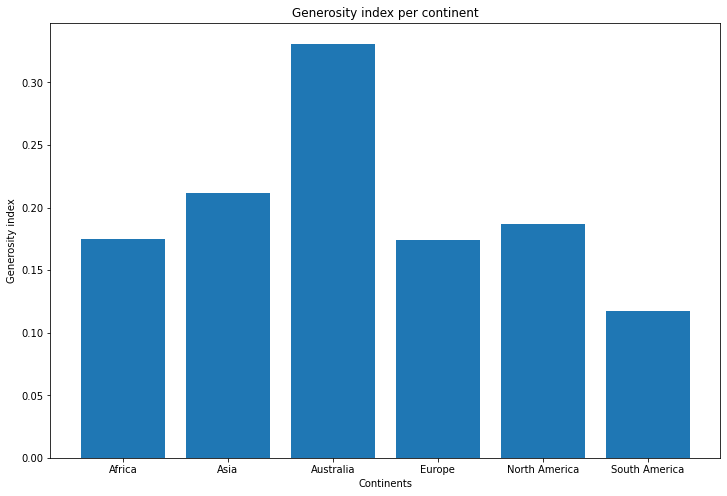

In [70]:
score_by_continent = group_by_continent["generosity"].mean()
plot_continents_barchart(score_by_continent, "Generosity index", "Generosity index per continent")

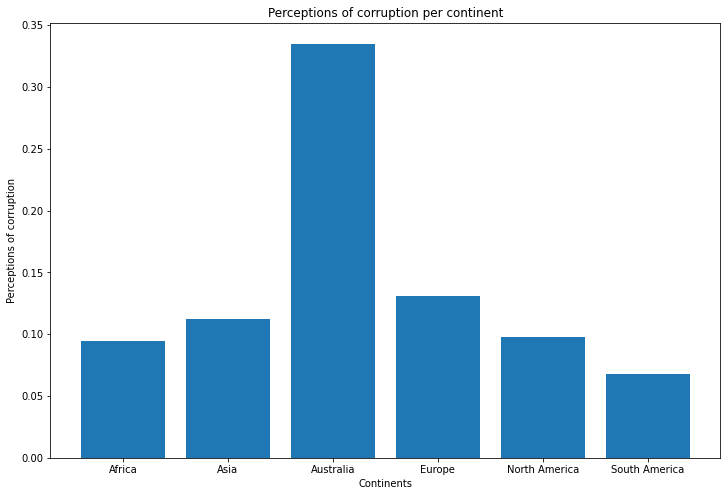

In [71]:
score_by_continent = group_by_continent["trust"].mean()
plot_continents_barchart(score_by_continent, "Perceptions of corruption", "Perceptions of corruption per continent")

- We can see that Australia has approximately the highest average in all fields, after that Europe, North America, and South America are roughly the same. Australia and Europe have a good lead in GDP per capita field. Finally, Asia and Africa have the lowest scores in all fields.

### Geographic Visualization of Happiness Score

In [72]:
data = dict(type = 'choropleth', 
           locations = happiness_data_2019.country,
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happiness_data_2019.score, 
           text = happiness_data_2019.country,
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

### Compare how GDP, Social Support and health changed over the years
Lets consider Gdp(monetary),Social Support(family) and Health as primary concerns for an individual residing in a country i.e overall wellbeing.Lets see how these distributions are altering over the years or are staying stagnant.

#### Healthy life expectancy over the Years

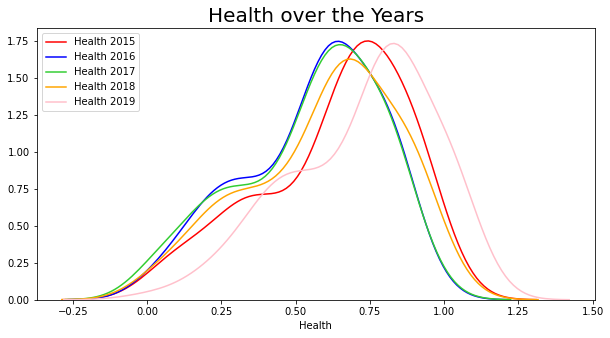

In [73]:
plt.figure(figsize=(10,5))
sns.kdeplot(happiness_data_2015['Health (Life Expectancy)'], color='red')
sns.kdeplot(happiness_data_2016['Health (Life Expectancy)'],color='blue')
sns.kdeplot(happiness_data_2017['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(happiness_data_2018['Healthy life expectancy'],color='orange')
sns.kdeplot(happiness_data_2019['healthy_life'],color='pink')
plt.title('Health over the Years',size=20)
plt.xlabel("Health")
plt.legend(["Health 2015", "Health 2016", "Health 2017", "Health 2018", "Health 2019"], loc='upper left')
plt.show()

It looks like the Healthy life expectancy, has been on a pretty good level at 2015. However after this year it experienced a drastic drop. Then a recover can be observed during 2018 and 2019. For 2019 we have even higher values than 2015.

#### GDP per capita (Economy) over the Years

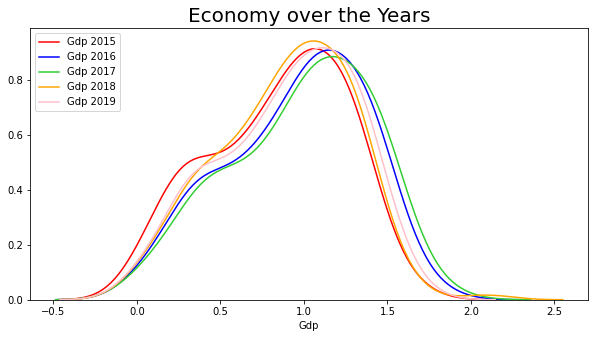

In [74]:
plt.figure(figsize=(10,5))
sns.kdeplot(happiness_data_2015['Economy (GDP per Capita)'],color='red')
sns.kdeplot(happiness_data_2016['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(happiness_data_2017['Economy..GDP.per.Capita.'],color='limegreen')
sns.kdeplot(happiness_data_2018['GDP per capita'],color='orange')
sns.kdeplot(happiness_data_2019['gdp'],color='pink')
plt.title('Economy over the Years',size=20)
plt.xlabel("Gdp")
plt.legend(["Gdp 2015", "Gdp 2016", "Gdp 2017", "Gdp 2018", "Gdp 2019"], loc='upper left')
plt.show()

We observe weak result during 2018 and 2019.

#### Social support over the Years

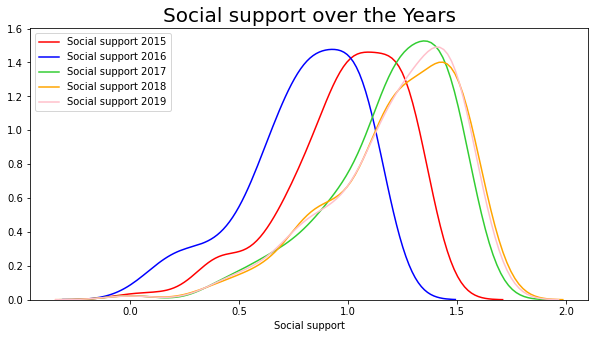

In [75]:
plt.figure(figsize=(10,5))
sns.kdeplot(happiness_data_2015['Family'],color='red')
sns.kdeplot(happiness_data_2016['Family'],color='blue')
sns.kdeplot(happiness_data_2017['Family'],color='limegreen')
sns.kdeplot(happiness_data_2018['Social support'],color='orange')
sns.kdeplot(happiness_data_2019['social_support'],color='pink')
plt.title('Social support over the Years',size=20)
plt.xlabel("Social support")
plt.legend(["Social support 2015", "Social support 2016", "Social support 2017", "Social support 2018", "Social support 2019"], 
           loc='upper left')
plt.show()

The social support is increasing over the years, except for 2016. We observe the lowest values there.

### Conclusion
Gdp, healthy life expectancy, and social support play the most significant role in contributing to happiness.

On continent level Australia has the best mean happiness score, whereas Africa has the worst.

### References
[1] https://www.kaggle.com/unsdsn/world-happiness

[2] https://www.kaggle.com/javadzabihi/happiness-2017-visualization-prediction

[3] https://www.kaggle.com/avnika22/world-happiness-report-eda-clustering